## Small Image Classification Using Convolutional Neural Network (CNN)


![image]("/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png")

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading Dataset
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()
xtrain.shape

170498071/170498071 [==============================] - 199s 1us/step


(50000, 32, 32, 3)

In [3]:
ytrain.shape

(50000, 1)

In [4]:
xtest.shape

(10000, 32, 32, 3)

In [5]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
# ytrain is 2D make it 1D for good classification
ytrain = ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
ytest = ytest.reshape(-1,)

In [10]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
classes = ["airplane", "Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

In [12]:
# Simple fuction to show image with labelled class
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

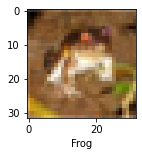

In [13]:
plot_sample(xtrain,ytrain,0)

In [14]:
# Normalizing data
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [15]:
# Building Artificial Neural Network

model = models.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
            layers.Dense(3000, activation='relu'),
            layers.Dense(1000, activation='relu'),
            layers.Dense(10, activation='softmax')    
])

model.compile(optimizer='SGD',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 81s 51ms/step - loss: 1.8131 - accuracy: 0.3516
Epoch 2/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.6220 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.5427 - accuracy: 0.4541
Epoch 4/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4837 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4352 - accuracy: 0.4949


In [16]:
# so from above ANN it is clear that simple neural network can't make good predictions

In [19]:
# CNN

cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer="adam",
           loss="sparse_categorical_crossentropy",
           metrics=['accuracy'])

cnn.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.4913 - accuracy: 0.4642
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1505 - accuracy: 0.5950
Epoch 3/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0250 - accuracy: 0.6427
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9469 - accuracy: 0.6695
Epoch 5/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8842 - accuracy: 0.6924
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8326 - accuracy: 0.7112
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7890 - accuracy: 0.7253
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7532 - accuracy: 0.7389
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7186 - accuracy: 0.7494
Epoch 10/10
1563/1563 [==============================] - 26s 17m

In [20]:
cnn.evaluate(xtest,ytest)

313/313 [==============================] - 2s 6ms/step - loss: 0.9218 - accuracy: 0.6935


[0.9218035936355591, 0.6934999823570251]

In [21]:
ypred = cnn.predict(xtest)

313/313 [==============================] - 2s 7ms/step


In [23]:
ypred[:3]

array([[2.23851902e-03, 1.09085673e-03, 1.41743920e-03, 6.78123057e-01,
        5.60861256e-04, 1.06013708e-01, 4.01950115e-03, 7.77148991e-04,
        2.05135703e-01, 6.23180124e-04],
       [7.07714958e-03, 1.98706791e-01, 1.94300046e-05, 1.37323511e-07,
        1.54545674e-08, 2.39312292e-10, 2.11846829e-09, 1.05598597e-09,
        7.91670263e-01, 2.52618291e-03],
       [2.47083027e-02, 1.62153363e-01, 2.64455797e-04, 1.75545196e-04,
        1.17282965e-04, 2.94997990e-05, 2.11032147e-05, 1.28835991e-05,
        8.07719350e-01, 4.79821907e-03]], dtype=float32)

In [25]:
y_classes_pred = [np.argmax(element) for element in ypred]

In [26]:
y_classes_pred[:5]

[3, 8, 8, 8, 4]

In [27]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

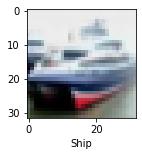

In [28]:
plot_sample(xtest, ytest, 1)

In [29]:
classes[y_classes_pred[1]]

'Ship'